In [1]:
import logging
logging.getLogger().setLevel(logging.ERROR)
from pathlib import Path
import numpy as np
from pprint import pprint
from docembedder.preprocessor.preprocessor import Preprocessor
from docembedder.utils import run_models
from docembedder.models import TfidfEmbedder
from docembedder.utils import SimulationSpecification
from docembedder import DataModel
from docembedder.analysis2 import DocAnalysis
from docembedder.visualization import plot_cpc_correlations

In [2]:
data_dir =  Path("..", "data")
output_dir = Path("..", "data", "results")
output_fp = output_dir / "tfidf.h5"
cpc_fp = Path(data_dir / "GPCPCs.txt")
patent_dir = Path(data_dir / "unprocessed")
output_dir.mkdir(exist_ok=True)

In [3]:
models = {
    "tfidf-default": TfidfEmbedder(),
    "tfidf-stem": TfidfEmbedder(stem=True),
    "tfidf-bigram": TfidfEmbedder(ngram_max=2),
    "tfidf-nostop": TfidfEmbedder(stop_words=None),
    "tfidf-norml2": TfidfEmbedder(norm="l2"),
    "tfidf-sublin": TfidfEmbedder(sublinear_tf=True),
    "tfidf-mindf2": TfidfEmbedder(min_df=2),
    "tfidf-mindf4": TfidfEmbedder(min_df=4),
    "tfidf-maxdf90": TfidfEmbedder(max_df=0.9),
}

In [4]:
%%time

sim_spec = SimulationSpecification(1838, 1850, window_size=4, debug_max_patents=1000)
run_models(None, models, sim_spec, patent_dir, output_fp, cpc_fp)

CPU times: user 23.7 ms, sys: 546 µs, total: 24.2 ms
Wall time: 23.8 ms


54it [00:00, 7535.93it/s]

{'default-tfidf-bigram': 0.149924981026751,
 'default-tfidf-default': 0.16092513098231778,
 'default-tfidf-maxdf90': 0.16099631837387898,
 'default-tfidf-mindf2': 0.1615185714369135,
 'default-tfidf-mindf4': 0.160037218905976,
 'default-tfidf-norml2': 0.14763201638276416,
 'default-tfidf-nostop': 0.10317595128482189,
 'default-tfidf-stem': 0.0608980736465047,
 'default-tfidf-sublin': 0.16659548421472606}


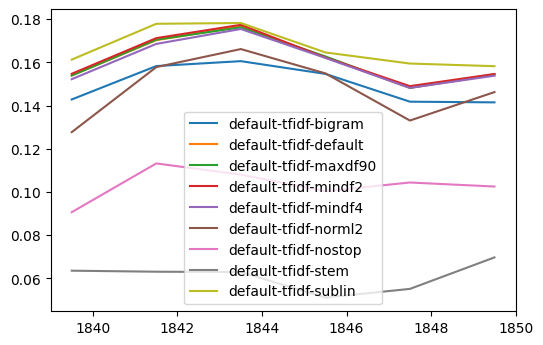

In [5]:
with DataModel(output_fp, read_only=False) as data:
    analysis = DocAnalysis(data)
    correlations = analysis.cpc_correlations()
    pprint({model_name: np.mean(cor["correlations"]) for model_name, cor in correlations.items()})
    plot_cpc_correlations(correlations)